- 딥러닝
  - 지도학습
    - 예측
    - 분류
  - 비지도학습
    - 차원축소
    - 오토인코더
    - 군집

- 텐서플로 : 예측


In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
(x,y),(x_test, y_test) = tf.keras.datasets.california_housing.load_data()
x_train,x_val,y_train,y_val =  train_test_split(x,y,random_state=123)

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(12384, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
# 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mse',optimizer='adam')
hist = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20, batch_size=32)
test_loss = model.evaluate(x_test,y_test)
print(f"test loss : {test_loss}")
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2score = r2_score(y_test,y_pred)
print(f"r2score : {r2score}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 56764379136.0000 - val_loss: 54639267840.0000
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56175038464.0000 - val_loss: 53936353280.0000
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55847616512.0000 - val_loss: 52224823296.0000
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53910781952.0000 - val_loss: 49334755328.0000
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49927278592.0000 - val_loss: 45330354176.0000
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46170775552.0000 - val_loss: 40504090624.0000
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39856082944.0000 - val_loss: 35186630656.0000
Epoch 8/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35033899008.0000 - val_loss: 29890387968.0000
Epoch 9/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 29860831232.0000 - val_loss: 24999092224.0000
Epoch 10/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 8m

In [ ]:
# 머신러닝 RendomForest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)
r2score = r2_score(y_test,y_pred)
print(f"r2score : {r2score}")

r2score : 0.8009251430972663


In [ ]:
# 파이토치 -- 텐서구조의 자료구조
# gpu(cuda) cpu 세팅
# 클래스 형태
# 데이터셋과 데이터로더(배치크기만큼) --> 상속, 클래스
  # getitem, len
# 모델 : 상속을 받아서 클래스
  # forward : 전방계산, init에서 정의한 각 레이어를 결합

# 학습루프 for
  # for -- epoch
    #  for -- batch
      # 옵티마이져 초기화(기울기)
      # 모델에 학습용 데이터 넣어서 예측값
      # 손실함수를 정의해서 손실값을 구하고
      # 손실값을 backward (기울기 계산)
      # 옵티마이져를 통해서 기울기를 적용/업데이트

In [ ]:
x_train.shape,y_train.shape
torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1).shape

torch.Size([12384, 1])

In [ ]:
import torch
import torch.nn as nn
class DatasetCalifornia(torch.utils.data.Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)
  def __len__(self):
    return len(self.x)
  def __getitem__(self,idx):
    return self.x[idx], self.y[idx]

from torch.utils.data import DataLoader
train_dataset = DatasetCalifornia(x_train, y_train)
val_dataset = DatasetCalifornia(x_val, y_val)
test_dataset = DatasetCalifornia(x_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# 모델생성
class CaliforniaModel(nn.Module):
  def __init__(self):
    super(CaliforniaModel,self).__init__()
    self.fc1 = nn.Linear(x_train.shape[1],30)
    self.fc2 = nn.Linear(30,15)
    self.fc3 = nn.Linear(15,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x
model = CaliforniaModel()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # 옵티마이져
loss_fn = nn.MSELoss() # 손실함수
# 학습루프
from tqdm import tqdm
epochs = 20
for epoch in range(epochs):
  iterator = tqdm(train_dataloader)
  for x,y in iterator:
    optimizer.zero_grad()  # 기울기 초기화
    y_pred = model(x)  # 예측
    loss = loss_fn(y_pred,y) # 손실값(텐서)
    loss.backward() # 기울기 계산
    optimizer.step() # 기울기 업데이트
    iterator.set_description(f"epoch : {epoch+1} loss : {loss.item()}")
# 모델을 저장
torch.save(model.state_dict(),'california.pth')
# 모델 불러오기
model = CaliforniaModel()
model.load_state_dict(torch.load('california.pth'))
test_loss = 0.0
with torch.no_grad():
  for x,y in test_dataloader:
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    test_loss += loss.item()
test_loss /= len(test_dataloader)
print(f"test loss : {test_loss}")
from sklearn.metrics import r2_score
y_pred = model(torch.tensor(x_test, dtype=torch.float32))
r2score = r2_score(y_test,y_pred.detach().numpy() )
print(f"r2score : {r2score}")

epoch : 20 loss : 7494410240.0: 100%|██████████| 387/387 [00:03<00:00, 111.02it/s]
<ipython-input-18-c49c9efcae5b>:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.lo

test loss : 8409751038.015504
r2score : 0.3674190044403076


- 분류
  - 텐서플로
  - 파이토치

In [21]:
# fashinmnist 분류
import tensorflow as tf
(x,y),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
# 텐서플로
x = x/255.0
x_test = x_test/255.0

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,random_state=123)

In [26]:
# c-p-c-p-c-flatten-fc1-fc1 # 채널정보 주어야 함
tensorflow_model = tf.keras.Sequential([
    # 입력 레이어
    tf.keras.layers.Input(shape=x_train.shape[1:]),
    # 채널정보 추가
    tf.keras.layers.Reshape((28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
tensorflow_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
tensorflow_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=32)
test_loss, test_acc = tensorflow_model.evaluate(x_test,y_test)
print(f"test loss : {test_loss}")
print(f"test acc : {test_acc}")
from sklearn.metrics import classification_report
import numpy as np
y_pred = tensorflow_model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1) # 10개 클래스에 대한 각각의 확률값의 최고값에 해당하는 인덱스가 곧 클래스번호
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 166s 116ms/step - accuracy: 0.5443 - loss: 1.2107 - val_accuracy: 0.7840 - val_loss: 0.5823
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 197s 113ms/step - accuracy: 0.7998 - loss: 0.5318 - val_accuracy: 0.8243 - val_loss: 0.4981
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 209s 118ms/step - accuracy: 0.8337 - loss: 0.4539 - val_accuracy: 0.8340 - val_loss: 0.4551
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 193s 112ms/step - accuracy: 0.8467 - loss: 0.4276 - val_accuracy: 0.8504 - val_loss: 0.4151
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 203s 112ms/step - accuracy: 0.8571 - loss: 0.3942 - val_accuracy: 0.8567 - val_loss: 0.4076
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 166s 118ms/step - accuracy: 0.8648 - loss: 0.3742 - val_accuracy: 0.8597 - val_loss: 0.3946
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 226s 135ms/step - accuracy: 0.8721 - loss: 0.3473 - val_accuracy: 0.8668 - val_loss: 0.3723
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 255s 181ms/step - ac

In [5]:
import tensorflow as tf
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
# from torch import cuda
# fashionmnist 분류
(x,y),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

x = x / 255.0
x_test = x_test / 255.0
x_train,x_val,y_train,y_val = train_test_split(x,y,stratify=y,random_state=45)

class FashionMnistDataset(torch.utils.data.Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.x = self.x.unsqueeze(1)  #origin (none, 28 28) (none,1,28,28)
    self.y = torch.tensor(y, dtype=torch.long)
  def __len__(self):
    return len(self.x)
  def __getitem__(self,idx):
    return self.x[idx], self.y[idx]
# 데이터 로더
train_dataset = FashionMnistDataset(x_train, y_train)
val_dataset = FashionMnistDataset(x_val, y_val)
test_dataset = FashionMnistDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# 모델 정의
# c-p-c-p-c-flattern-fc-fc
class FashionMnist(nn.Module):
  def __init__(self):
    super(FashionMnist,self).__init__()
    self.conv1 = nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1)  # same padding
    self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2) # 14 14
    self.conv2 = nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1)  # same padding
    self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2) # 7 7
    self.conv3 = nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1)  # same padding
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(128*7*7,128)
    self.fc2 = nn.Linear(128,10)
  def forward(self,x):
    x = torch.relu( self.conv1(x) )
    x = self.pool1(x)
    x = torch.relu( self.conv2(x) )
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.flatten(x)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

# device = cuda if torch.cuda.is_available() else 'cpu'
import torch_directml
device = torch_directml.device()

model = FashionMnist()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # 옵티마이져
loss_fn = nn.CrossEntropyLoss() # 손실함수
# 학습루프
# 파이토치의 conv 는 (batchsize,channel,....)
for epoch in range(10):
  iterator = tqdm(train_loader)
  for x,y in iterator:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    loss.backward()
    optimizer.step()
    iterator.set_description(f"epoch : {epoch+1} loss : {loss.item()}")

# 모델을 저장
torch.save(model.state_dict(),'fashionmnist.pth')
# 모델 불러오기
model = FashionMnist()
model.load_state_dict(torch.load('fashionmnist.pth'))
# 모델 평가
test_loss = 0.0
with torch.no_grad():
  for x,y in test_loader:
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    test_loss += loss.item()
test_loss /= len(test_loader)
print(f"test loss : {test_loss}")

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [8]:
import tensorflow as tf
tf.version

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [7]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = model(torch.tensor(x_test, dtype=torch.float32))
y_pred = np.argmax(y_pred,axis=1)
classification_report(y_test,y_pred.detach().numpy())

ModuleNotFoundError: No module named 'sklearn'

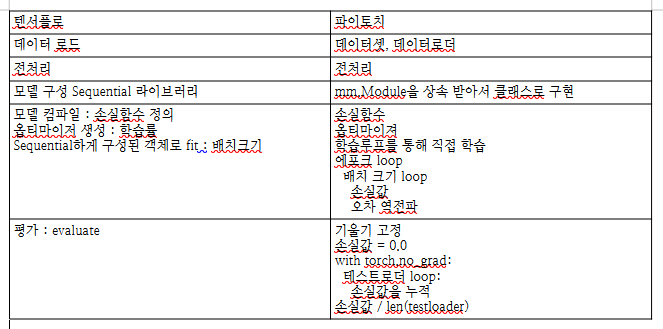